  → Loaded shape: (70000, 784)
Subsampled to: (10000, 784)


/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: Th

  silhouette for k=2: 0.1673


/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


  silhouette for k=3: 0.1404


/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


  silhouette for k=4: 0.1325


/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


  silhouette for k=5: 0.1183


/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


  silhouette for k=6: 0.1086


/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


  silhouette for k=7: 0.1090


/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


  silhouette for k=8: 0.1167


/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


  silhouette for k=9: 0.1242


/Users/limengfeiyang/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


  silhouette for k=10: 0.1186


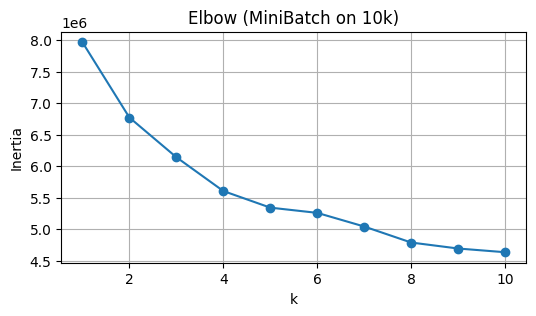

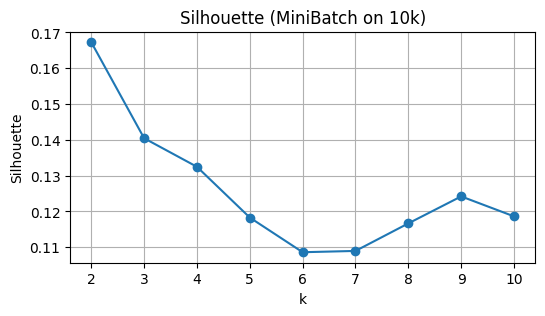

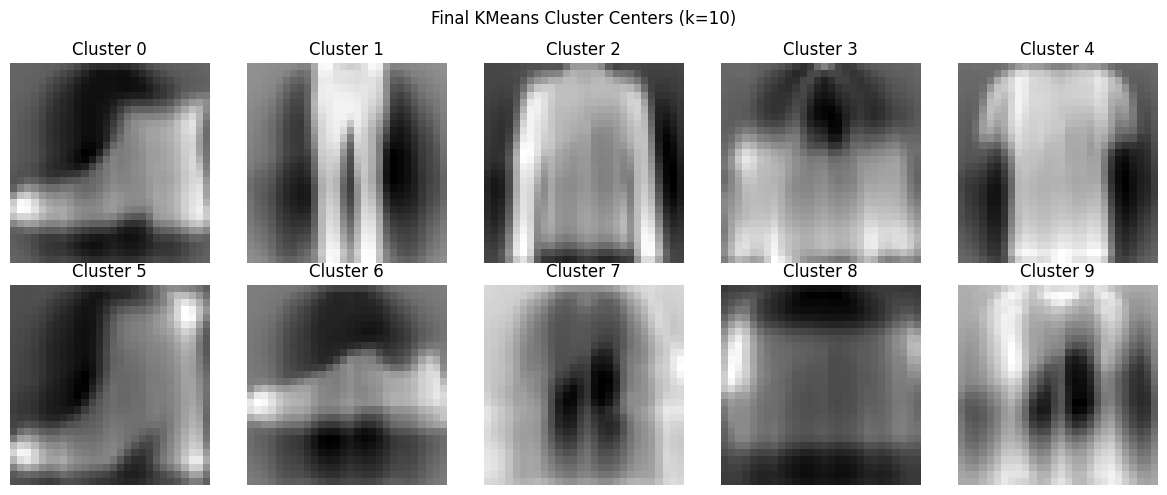

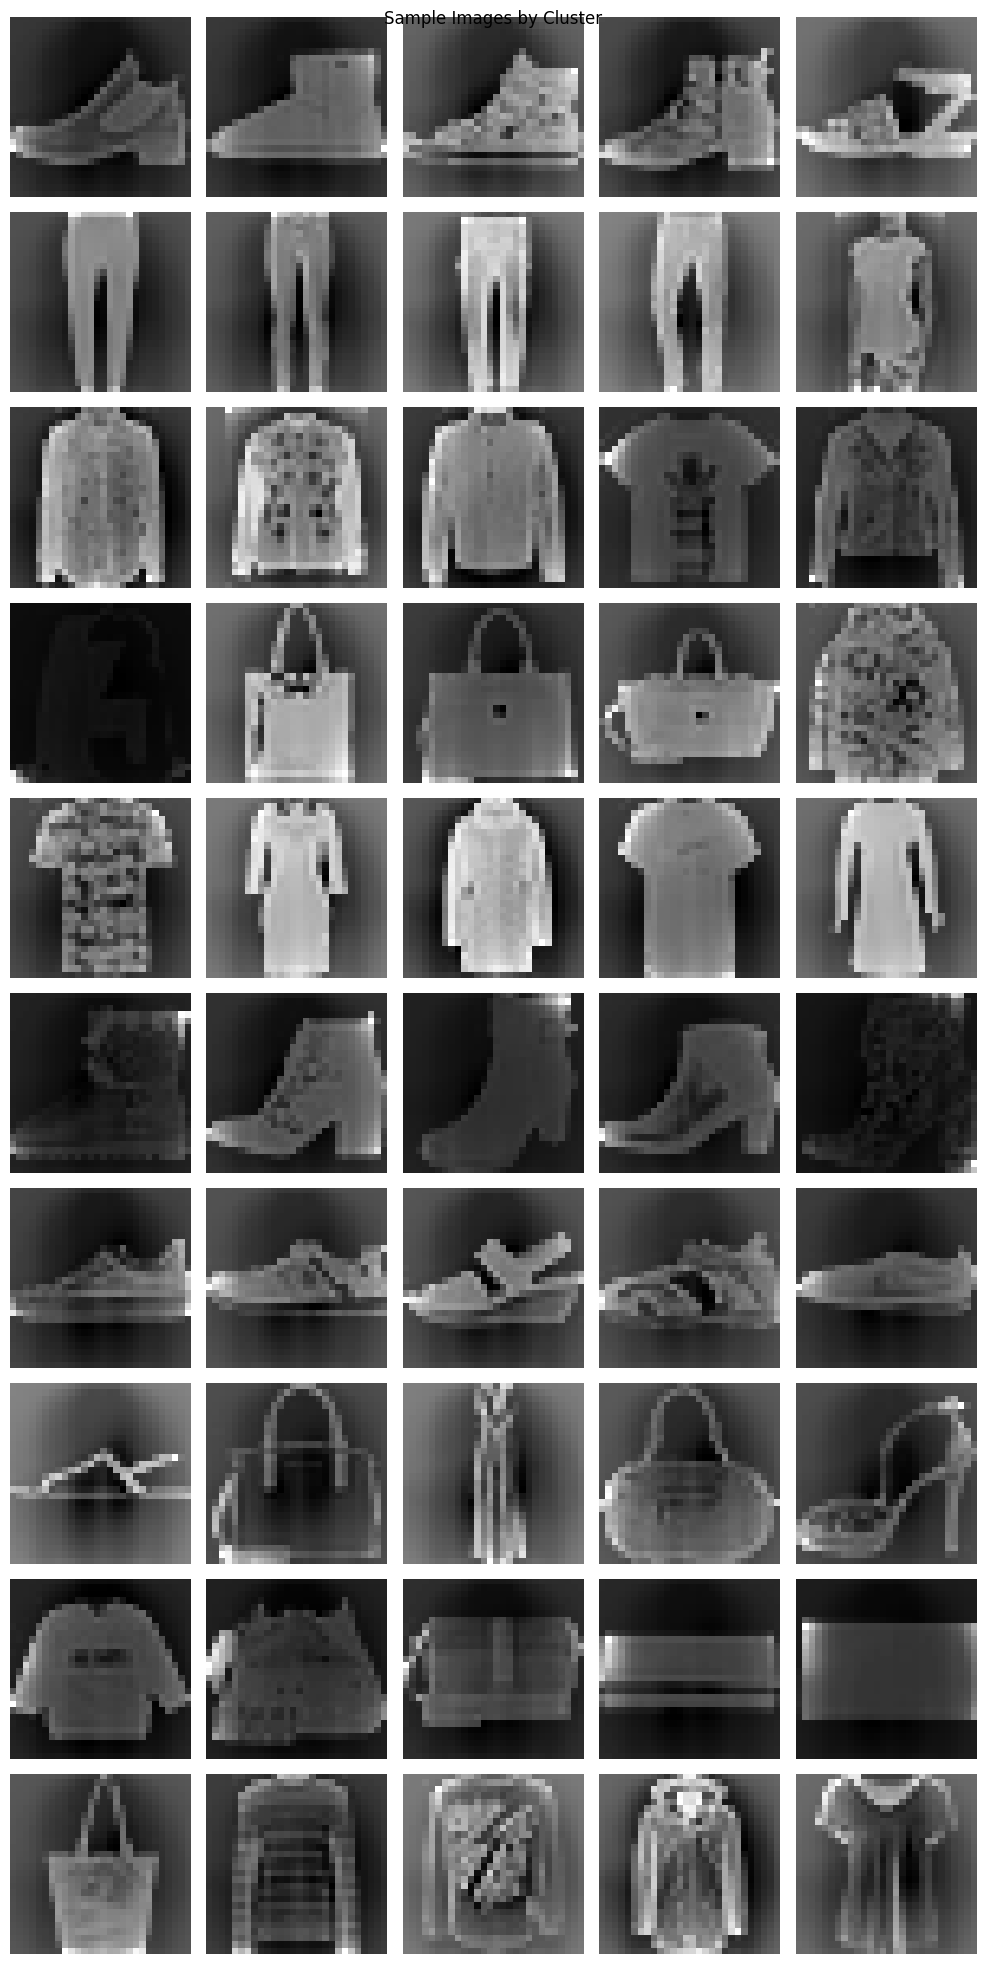

Clustering purity (accuracy vs. true labels): 0.5531


/var/folders/54/ll_k3q313911ddgdr582qw8r0000gn/T/ipykernel_67818/2179991239.py:111: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  most_common = mode(y[mask])[0][0]


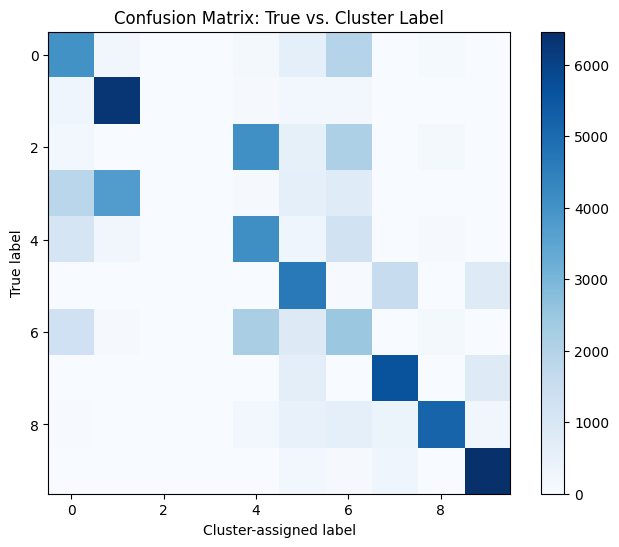

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load data
fn = '/Users/limengfeiyang/CMOR438-final-project/data/processed/fashion_mnist1/X_fashion.npy'
X = np.load(fn)
print("  → Loaded shape:", X.shape)


# Preprocess & subsample
X = X.astype(float) / 255.0
X_scaled = StandardScaler().fit_transform(X)
rng = np.random.RandomState(42)
idx = rng.choice(len(X_scaled), size=10000, replace=False)
X_sub = X_scaled[idx]
print("Subsampled to:", X_sub.shape)


# Elbow & silhouette with MiniBatchKMeans
inertias, sil_scores = [], []

for k in range(1, 11):
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=1000,
                          max_iter=100, random_state=42)
    mbk.fit(X_sub)
    inertias.append(mbk.inertia_)

for k in range(2, 11):
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=1000,
                          max_iter=100, random_state=42)
    labels = mbk.fit_predict(X_sub)
    sil = silhouette_score(X_sub, labels)
    sil_scores.append(sil)
    print(f"  silhouette for k={k}: {sil:.4f}")


# Plots
plt.figure(figsize=(6,3))
plt.plot(range(1,11), inertias, 'o-')
plt.title('Elbow (MiniBatch on 10k)')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.grid(True)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(range(2,11), sil_scores, 'o-')
plt.title('Silhouette (MiniBatch on 10k)')
plt.xlabel('k'); plt.ylabel('Silhouette'); plt.grid(True)
plt.show()



# Final K-Means fit on the full dataset (k=10)
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

# Load true labels
y = np.load('/Users/limengfeiyang/CMOR438-final-project/data/processed/fashion_mnist1/X_fashion.npy'.replace('X_fashion','y_fashion'))

# Fit standard KMeans on the entire scaled data
final_k = 10
km_full = KMeans(
    n_clusters=final_k,
    random_state=42,
    n_init=20,
    max_iter=500
).fit(X_scaled)
labels_full = km_full.labels_



# Visualize the 10 cluster-centers as 28×28 images
centers = km_full.cluster_centers_.reshape(final_k, 28, 28)

fig, axs = plt.subplots(2, 5, figsize=(12,5))
for i, ax in enumerate(axs.flat):
    ax.imshow(centers[i], cmap='gray')
    ax.set_title(f'Cluster {i}')
    ax.axis('off')
plt.suptitle('Final KMeans Cluster Centers (k=10)')
plt.tight_layout()
plt.show()



# Show 5 sample images per cluster
fig, axs = plt.subplots(final_k, 5, figsize=(10, 2*final_k))
for cluster in range(final_k):
    idxs = np.where(labels_full == cluster)[0][:5]
    for j, idx in enumerate(idxs):
        axs[cluster, j].imshow(
            (X[idx].reshape(28,28)), cmap='gray'
        )
        axs[cluster, j].axis('off')
        if j == 0:
            axs[cluster, j].set_ylabel(f'Cluster {cluster}', 
                                       rotation=0, labelpad=40)
plt.suptitle('Sample Images by Cluster')
plt.tight_layout()
plt.show()



# Compute clustering purity (assign each cluster to its most‐common true label)
cluster_to_label = {}
for c in range(final_k):
    mask = (labels_full == c)
    most_common = mode(y[mask])[0][0]
    cluster_to_label[c] = most_common

# Map each point to its cluster’s “predicted” label
y_pred = np.array([cluster_to_label[c] for c in labels_full])

purity = accuracy_score(y, y_pred)
print(f'Clustering purity (accuracy vs. true labels): {purity:.4f}')


# Confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix: True vs. Cluster Label')
plt.xlabel('Cluster-assigned label')
plt.ylabel('True label')
plt.colorbar()
plt.show()
